# Setup

In [ ]:
!pip install geopandas
!pip install folium

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 289 kB/s 
     |████████████████████████████████| 6.3 MB 33.6 MB/s 


In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from plotly.express import set_mapbox_access_token, scatter_mapbox

In [2]:
from pandas import set_option
import pandas as pd
import datetime
import numpy as np
import altair as alt

#set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

# Census Data

*  Read in 5-yr ACS population estimates
*  One dataframe with all 5-yr estimates
*  All NY zip codes - filter to just NYC
*  Merge onto accident data








In [ ]:
keep_cols1 = ["Geographic Area Name",
             "Estimate!!SEX AND AGE!!Total population",
             "Estimate!!RACE!!Total population",
             "Estimate!!RACE!!White",
             "Estimate!!RACE!!Black or African American",
             "Estimate!!RACE!!American Indian and Alaska Native",
             "Estimate!!RACE!!Asian",
             "Estimate!!RACE!!Native Hawaiian and Other Pacific Islander",
             "Estimate!!RACE!!Some other race",
             "Estimate!!HISPANIC OR LATINO AND RACE!!Total population",
             "Estimate!!Total housing units"]

# changes after 2013
keep_cols2 = ["Geographic Area Name",
             "Estimate!!SEX AND AGE!!Total population",
             "Estimate!!RACE!!Total population",
             "Estimate!!RACE!!One race!!White",
             "Estimate!!RACE!!One race!!Black or African American",
             "Estimate!!RACE!!One race!!American Indian and Alaska Native",
             "Estimate!!RACE!!One race!!Asian",
             "Estimate!!RACE!!One race!!Native Hawaiian and Other Pacific Islander",
             "Estimate!!RACE!!One race!!Some other race",
             "Estimate!!RACE!!Two or more races",
             "Estimate!!HISPANIC OR LATINO AND RACE!!Total population",
             "Estimate!!Total housing units"]

# changes again after 2016
keep_cols3 = ["Geographic Area Name",
             "Estimate!!SEX AND AGE!!Total population",
             "Estimate!!RACE!!Total population",
             "Estimate!!RACE!!Total population!!One race!!White",
             "Estimate!!RACE!!Total population!!One race!!Black or African American",
             "Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native",
             "Estimate!!RACE!!Total population!!One race!!Asian",
             "Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander",
             "Estimate!!RACE!!Total population!!One race!!Some other race",
             "Estimate!!RACE!!Total population!!Two or more races",
             "Estimate!!HISPANIC OR LATINO AND RACE!!Total population",
             "Estimate!!Total housing units"]


new_names1 = ["Total Pop",
             "Race Pop",
             "White",
             "Black",
             "Native American",
             "Asian",
             "Hawaiian/PI",
             "Other Race",
             "Hispanic",
             "Housing Units",
             "Geographic Area Name"]

new_names2 = ["Total Pop",
             "Race Pop",
             "White",
             "Black",
             "Native American",
             "Asian",
             "Hawaiian/PI",
             "Other Race",
             "Mixed Race",
             "Hispanic",
             "Housing Units",
             "Geographic Area Name"]

In [ ]:
file_names = ["ACSDP5Y2011.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2012.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2013.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2014.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2015.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2016.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2017.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2018.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2019.DP05_data_with_overlays_2022-05-04T074751.csv",
              "ACSDP5Y2020.DP05_data_with_overlays_2022-05-04T074751.csv"]

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
i = 0

acs_data = pd.DataFrame(columns = new_names2)

for file_name in file_names:
  yr = years[i]
  if (yr <= 2012):
      print("1: ", yr, i, file_name)
      temp_df = pd.read_csv("ACS-5yr-estimates/"+file_name, skiprows=1, usecols = keep_cols1)
      temp_df.columns = new_names1
      temp_df["Mixed Race"] = 0 # fill for empty column
      temp_df = temp_df[new_names2] # reorder columns
      temp_df["Year"] = yr
  elif((yr > 2012) & (yr <= 2016)):
      print("2: ", yr, i, file_name)
      temp_df = pd.read_csv("ACS-5yr-estimates/"+file_name, skiprows=1, usecols = keep_cols2)
      temp_df.columns = new_names2
      temp_df["Year"] = yr
  else:
      print("3: ", yr, i, file_name)
      temp_df = pd.read_csv("ACS-5yr-estimates/"+file_name, skiprows=1, usecols = keep_cols3)
      temp_df.columns = new_names2
      temp_df["Year"] = yr
  acs_data = pd.concat([acs_data, temp_df])
  del(temp_df)
  i += 1

1:  2011 0 ACSDP5Y2011.DP05_data_with_overlays_2022-05-04T074751.csv
1:  2012 1 ACSDP5Y2012.DP05_data_with_overlays_2022-05-04T074751.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2:  2013 2 ACSDP5Y2013.DP05_data_with_overlays_2022-05-04T074751.csv
2:  2014 3 ACSDP5Y2014.DP05_data_with_overlays_2022-05-04T074751.csv
2:  2015 4 ACSDP5Y2015.DP05_data_with_overlays_2022-05-04T074751.csv
2:  2016 5 ACSDP5Y2016.DP05_data_with_overlays_2022-05-04T074751.csv
3:  2017 6 ACSDP5Y2017.DP05_data_with_overlays_2022-05-04T074751.csv
3:  2018 7 ACSDP5Y2018.DP05_data_with_overlays_2022-05-04T074751.csv
3:  2019 8 ACSDP5Y2019.DP05_data_with_overlays_2022-05-04T074751.csv
3:  2020 9 ACSDP5Y2020.DP05_data_with_overlays_2022-05-04T074751.csv


In [ ]:
acs_data[acs_data['Year']<2013].sample(5)

,Total Pop,Race Pop,White,Black,Native American,Asian,Hawaiian/PI,Other Race,Mixed Race,Hispanic,Housing Units,Geographic Area Name,Year
1709,6691,6691,5365,100,1294,101,21,92,0,6691,3511,ZCTA5 14779,2012.0
1211,77,77,77,0,0,0,0,0,0,77,464,ZCTA5 13436,2012.0
1510,8071,8071,4579,3358,0,169,0,128,0,8071,4850,ZCTA5 14209,2012.0
1467,50472,50472,46369,3701,538,498,34,489,0,50472,22214,ZCTA5 14094,2011.0
1177,50,50,50,0,0,0,0,0,0,50,324,ZCTA5 13353,2011.0


In [ ]:
acs_data['Zip Code'] = acs_data['Geographic Area Name'].apply(lambda x : x[5:].strip())

In [ ]:
acs_data['Zip Code'] = acs_data['Zip Code'].astype('str')
acs_data['Year'] = acs_data['Year'].astype('int')

In [ ]:
acs_data[(acs_data['Zip Code']=="10281") & (acs_data['Year']==2014)]

,Total Pop,Race Pop,White,Black,Native American,Asian,Hawaiian/PI,Other Race,Mixed Race,Hispanic,Housing Units,Geographic Area Name,Year,Zip Code


### Filter to NYC Zip Codes

In [ ]:
nyc_zips = pd.read_csv("Data/nyc_zips.csv", usecols = ['ZipCode', 'Borough'])
nyc_zips['ZipCode'] = nyc_zips['ZipCode'].astype('str')

print(nyc_zips.shape)
nyc_zips.head()

(480, 2)


,ZipCode,Borough
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan


In [ ]:
# none start with 0 so don't have to adjust

nyc_zip_list = nyc_zips[nyc_zips["Borough"]!= "Staten Island"]['ZipCode']

print(nyc_zip_list.sample(10))
print(len(nyc_zip_list))

189    11357
204    11372
422    11363
64     10123
281    11218
474    10308
51     10104
280    11217
275    11212
103    10308
Name: ZipCode, dtype: object
480


In [ ]:
nyc_acs = acs_data[acs_data['Zip Code'].isin(nyc_zip_list)].reset_index(drop = True)
print(nyc_acs.shape)

(2050, 14)


In [ ]:
nyc_zip_list

0      10001
1      10002
2      10003
3      10004
4      10005
       ...  
475    10309
476    10310
477    10311
478    10312
479    10314
Name: ZipCode, Length: 480, dtype: object

In [ ]:
nyc_acs.sample(5)

,Total Pop,Race Pop,White,Black,Native American,Asian,Hawaiian/PI,Other Race,Mixed Race,Hispanic,Housing Units,Geographic Area Name,Year,Zip Code
311,24405,24405,12534,4298,345,4117,7,3554,0,24405,11418,ZCTA5 11101,2012,11101
1556,67040,1149,20877,39272,70,2863,0,2809,67040,24128,67040,ZCTA5 11210,2018,11210
725,36816,36816,27908,836,84,4160,0,2905,923,36816,16972,ZCTA5 11105,2014,11105
566,0,0,0,0,0,0,0,0,0,0,0,ZCTA5 11359,2013,11359
3,2604,2604,1897,261,0,515,0,48,0,2604,1813,ZCTA5 10004,2011,10004


In [ ]:
nyc_acs[['Total Pop', 'Housing Units', 'Year', 'Zip Code']].tail()

,Total Pop,Housing Units,Year,Zip Code
2045,68454,22279,2020,11691
2046,22394,7826,2020,11692
2047,13029,5780,2020,11693
2048,21258,9005,2020,11694
2049,3527,2628,2020,11697


In [ ]:
acs_data.loc[(acs_data['Zip Code']==10281)]

,Total Pop,Race Pop,White,Black,Native American,Asian,Hawaiian/PI,Other Race,Mixed Race,Hispanic,Housing Units,Geographic Area Name,Year,Zip Code


In [ ]:
nyc_acs.loc[(nyc_acs['Year']==2019)&(nyc_acs['Zip Code']=="10281")]

,Total Pop,Race Pop,White,Black,Native American,Asian,Hawaiian/PI,Other Race,Mixed Race,Hispanic,Housing Units,Geographic Area Name,Year,Zip Code


In [ ]:
# use 2020 numbers for 2021 and 2022 (won't use 22 b/c incomplete half year)

nyc_acs_2020 = nyc_acs[nyc_acs['Year']==2020].reset_index(drop = True)
nyc_acs_2020['Year'] = 2021

nyc_acs = pd.concat([nyc_acs, nyc_acs_2020])
nyc_acs = nyc_acs.reset_index(drop = True)
print(nyc_acs.shape)

(2255, 14)


### Pick Comparison Zips

In addition to Mott Haven

In [ ]:
nyc_acs[nyc_acs['Zip Code']=="11231"]

,Total Pop,Race Pop,White,Black,Native American,Asian,Hawaiian/PI,Other Race,Mixed Race,Hispanic,Housing Units,Geographic Area Name,Year,Zip Code
141,35109,35109,22515,5505,86,2408,5,5967,0,35109,16969,ZCTA5 11231,2011,11231
346,34393,34393,22878,5321,55,2316,7,5261,0,34393,16914,ZCTA5 11231,2012,11231
551,34137,34137,22018,4233,22,1898,0,4583,1383,34137,16499,ZCTA5 11231,2013,11231
756,34605,34605,22981,4279,39,1832,0,3803,1671,34605,16516,ZCTA5 11231,2014,11231
961,35263,35263,23327,4570,139,1814,0,3620,1793,35263,16446,ZCTA5 11231,2015,11231
1166,36302,36302,24286,4709,132,1818,0,3503,1854,36302,16557,ZCTA5 11231,2016,11231
1371,37680,37680,2067,25184,5023,223,1951,0,3232,37680,16738,ZCTA5 11231,2017,11231
1576,37845,2266,24939,5262,237,2135,268,2738,37845,16878,37845,ZCTA5 11231,2018,11231
1781,37874,37874,1920,25113,5796,215,2223,303,2304,37874,16965,ZCTA5 11231,2019,11231
1986,37796,37796,2418,25236,5572,137,2196,263,1974,37796,17230,ZCTA5 11231,2020,11231


In [ ]:
avg_pop = nyc_acs[nyc_acs['Zip Code']=="11231"]['Total Pop'].mean()
print(avg_pop)

avg_white = nyc_acs[nyc_acs['Zip Code']=="11231"]['White'].mean()
print(avg_white)

avg_black = nyc_acs[nyc_acs['Zip Code']=="11231"]['Black'].mean()
print(avg_black)

avg_asian = nyc_acs[nyc_acs['Zip Code']=="11231"]['Asian'].mean()
print(avg_asian)

avg_hispanic = nyc_acs[nyc_acs['Zip Code']=="11231"]['Hispanic'].mean()
print(avg_hispanic)

avg_housing = nyc_acs[nyc_acs['Zip Code']=="11231"]['Housing Units'].mean()
print(avg_housing)

36254.545454545456
15615.181818181818
12240.727272727272
1357.5454545454545
34348.454545454544
18719.0


In [ ]:
zip_avgs = nyc_acs.groupby(['Zip Code'])['Total Pop', 'White', 'Black', 'Asian', 'Hispanic', 'Housing Units'].mean().reset_index()
zip_avgs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Zip Code,Total Pop,White,Black,Asian,Hispanic,Housing Units
0,10001,23119.818182,9424.363636,7111.272727,2846.181818,22321.363636,14450.000000
1,10002,78063.454545,17376.727273,12879.909091,22620.363636,74493.545455,39278.454545
2,10003,55736.090909,28564.636364,16518.636364,5063.909091,53571.909091,33156.363636
3,10004,3041.181818,1419.272727,849.090909,404.909091,2960.363636,2175.272727
4,10005,7766.545455,3581.000000,2455.454545,887.454545,7471.454545,5497.000000


In [ ]:
# Find difference from the mean for each metric
zip_avgs['total_diff'] = abs(zip_avgs['Total Pop'] - avg_pop)
zip_avgs['white_diff'] = abs(zip_avgs['White'] - avg_white)
zip_avgs['black_diff'] = abs(zip_avgs['Black'] - avg_black)
zip_avgs['asian_diff'] = abs(zip_avgs['Asian'] - avg_asian)
zip_avgs['hisp_diff'] = abs(zip_avgs['Hispanic'] - avg_hispanic)
zip_avgs['housing_diff'] = abs(zip_avgs['Housing Units'] - avg_housing)

zip_avgs["abs_diff"] = zip_avgs[['total_diff', 'white_diff', 'black_diff', 'asian_diff',
                                 'hisp_diff', 'housing_diff']].sum(axis = 1)

In [ ]:
zip_avgs.sort_values(by = 'abs_diff').head(10)

,Zip Code,Total Pop,White,Black,Asian,Hispanic,Housing Units,total_diff,white_diff,black_diff,asian_diff,hisp_diff,housing_diff,abs_diff
141,11231,36254.545455,15615.181818,12240.727273,1357.545455,34348.454545,18719.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
133,11222,35495.727273,19335.909091,11477.909091,1266.272727,33874.272727,20296.636364,758.818182,3720.727273,762.818182,91.272727,474.181818,1577.636364,7385.454545
67,10301,38878.545455,15475.909091,14575.090909,1511.090909,36845.181818,18422.636364,2624.000000,139.272727,2334.363636,153.545455,2496.727273,296.363636,8044.272727
175,11379,36567.272727,19676.363636,10884.909091,2024.090909,34454.818182,16722.818182,312.727273,4061.181818,1355.818182,666.545455,106.363636,1996.181818,8498.818182
110,11105,37235.909091,18986.000000,10638.090909,2729.454545,35419.000000,18992.454545,981.363636,3370.818182,1602.636364,1371.909091,1070.545455,273.454545,8670.727273
174,11378,34883.636364,16898.272727,9913.727273,2075.545455,32755.636364,15987.181818,1370.909091,1283.090909,2327.000000,718.000000,1592.818182,2731.818182,10023.636364
108,11103,37121.363636,18473.181818,9718.272727,3484.818182,35473.727273,19707.727273,866.818182,2858.000000,2522.454545,2127.272727,1125.272727,988.727273,10488.545455
111,11106,37939.818182,14898.727273,9414.181818,4457.454545,36186.272727,20469.636364,1685.272727,716.454545,2826.545455,3099.909091,1837.818182,1750.636364,11916.636364
128,11217,39977.636364,15088.363636,13941.818182,1826.636364,37966.727273,21051.272727,3723.090909,526.818182,1701.090909,469.090909,3618.272727,2332.272727,12370.636364
8,10010,32391.818182,15124.545455,10009.636364,3074.181818,31010.454545,19821.363636,3862.727273,490.636364,2231.090909,1716.636364,3338.000000,1102.363636,12741.454545


In [ ]:
from pandas.core.reshape.concat import concat
# redhook and surrounding areas
redhook = ['11231']
around_redhook = ["11201", "11217", "11215", "11232"]

# bronx
mott_haven = ["10451", "10454", "10455"]

# other demo similar 

other = ["11222", "11379", "11103", "11106", "11378"]

# 11222 = Greenpoint
# 11379 = Middle Village
# 11103 = Long Island City
# 11106 = Astoria
# 11378 = Maspeth

comparison_zips = redhook + around_redhook + mott_haven + other
comparison_zips

['11231',
 '11201',
 '11217',
 '11215',
 '11232',
 '10451',
 '10454',
 '10455',
 '11222',
 '11379',
 '11103',
 '11106',
 '11378']

# Clean Collision Data



* All boroughs - remove Staten Island
* Accidents by resident count (zip code level)
* Distinguish truck and non-truck accidents
* Truck routes for Red Hook and Mott Haven



Use data pull from the time of the project.

Can also use API - see Open Data API Access Accidents.ipynb

Download file here: https://drive.google.com/file/d/1iGPrt6qzD6zjE3mhKg5K1395wa4ntwN6/view?usp=share_link

In [ ]:
collisions = pd.read_csv("Data/Motor_Vehicle_Collisions_Crashes_ALL.csv")

In [ ]:
collisions.sample(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
300075,03/26/2022,23:23,NaN,NaN,40.793472,-73.937260,"(40.793472, -73.93726)",1 AVENUE,NaN,NaN,1.0,0.0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4513898,E-Bike,NaN,NaN,NaN,NaN
1673085,04/16/2013,10:37,MANHATTAN,10036,40.760405,-73.987474,"(40.760405, -73.9874743)",8 AVENUE,WEST 47 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,40957,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN
838388,05/13/2017,18:30,NaN,NaN,40.830112,-73.850266,"(40.830112, -73.850266)",CROSS BRONX EXPY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,Following Too Closely,NaN,NaN,NaN,3669798,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [ ]:
collisions["Pedestrian_hurt"] = collisions[['NUMBER OF PEDESTRIANS INJURED',
                                            'NUMBER OF PEDESTRIANS KILLED',
                                            'NUMBER OF CYCLIST INJURED',
                                            'NUMBER OF CYCLIST KILLED']].sum(axis = 1)

In [ ]:
collisions = collisions.dropna(subset = ['ZIP CODE']).reset_index(drop = True)
collisions = collisions[collisions['ZIP CODE']!='     '].reset_index(drop = True)

# convert all zips to strings
collisions['ZIP CODE'] = collisions['ZIP CODE'].apply(lambda x: str(int(x)) if isinstance(x, float) else str(x))
collisions = collisions[collisions['ZIP CODE'].isin(nyc_zip_list)].reset_index(drop = True)
print(collisions.shape)

(1234397, 30)


In [ ]:
# identify incidents w/ trucks
collisions['truck_involved'] = 0
collisions['truck_involved'] = np.where(collisions['VEHICLE TYPE CODE 5'].fillna("").str.contains("truck", case = False), 
                                         1, collisions['truck_involved'])
collisions['truck_involved'] = np.where(collisions['VEHICLE TYPE CODE 4'].fillna("").str.contains("truck", case = False), 
                                         1, collisions['truck_involved'])
collisions['truck_involved'] = np.where(collisions['VEHICLE TYPE CODE 3'].fillna("").str.contains("truck", case = False), 
                                         1, collisions['truck_involved'])
collisions['truck_involved'] = np.where(collisions['VEHICLE TYPE CODE 2'].fillna("").str.contains("truck", case = False), 
                                         1, collisions['truck_involved'])
collisions['truck_involved'] = np.where(collisions['VEHICLE TYPE CODE 1'].fillna("").str.contains("truck", case = False), 
                                         1, collisions['truck_involved'])

In [ ]:
collisions['Date'] = pd.to_datetime(collisions['CRASH DATE'])
collisions['year'] = pd.DatetimeIndex(collisions['Date']).year
collisions['month_year'] = collisions['Date'].dt.to_period('M')
collisions['hour'] = collisions['CRASH TIME'].apply(lambda x : x.split(":")[0]).astype('int')

In [ ]:
collisions = collisions.loc[collisions['year'] < 2022].reset_index(drop = True)

In [ ]:
collisions.sample(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Pedestrian_hurt,truck_involved,Date,year,month_year,hour
905894,08/11/2014,16:35,MANHATTAN,10016,40.746302,-73.971659,"(40.7463024, -73.9716588)",EAST 38 STREET,1 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,1006755,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,0,2014-08-11,2014,2014-08,16
142201,12/06/2021,0:50,BROOKLYN,11206,40.704277,-73.933014,"(40.704277, -73.933014)",BOGART STREET,VARET STREET,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,4483928,Taxi,Sedan,NaN,NaN,NaN,0,0,2021-12-06,2021,2021-12,0
521239,03/06/2017,19:30,MANHATTAN,10033,40.851840,-73.932370,"(40.85184, -73.93237)",NaN,NaN,608 WEST 185 STREET,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Passing or Lane Usage Improper,NaN,NaN,NaN,3628864,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,0,0,2017-03-06,2017,2017-03,19
107976,03/27/2020,12:30,BRONX,10463,40.888256,-73.904970,"(40.888256, -73.90497)",NaN,NaN,3840 GREYSTONE AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4313254,Sedan,NaN,NaN,NaN,NaN,0,0,2020-03-27,2020,2020-03,12
923353,07/07/2014,6:20,BROOKLYN,11233,40.668372,-73.922631,"(40.6683725, -73.9226314)",EASTERN PARKWAY,RALPH AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,736233,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN,0,0,2014-07-07,2014,2014-07,6


In [ ]:
collisions['BOROUGH'].unique()

array(['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN'], dtype=object)

In [ ]:
collisions['Date'].max()

Timestamp('2021-12-31 00:00:00')

In [ ]:
collisions['Date'].min()

Timestamp('2012-07-01 00:00:00')

### Hourly Collision Counts

In [ ]:
hr_count_all = collisions.groupby(['hour', "ZIP CODE", 'year', 'truck_involved'])['COLLISION_ID'].nunique().reset_index()
hr_count_all.head()

,hour,ZIP CODE,year,truck_involved,COLLISION_ID
0,0,10001,2012,0,25
1,0,10001,2012,1,1
2,0,10001,2013,0,49
3,0,10001,2013,1,2
4,0,10001,2014,0,58


In [ ]:
hr_count_all = hr_count_all[hr_count_all["ZIP CODE"].isin([11231, 10451, 10454, 10455])].reset_index(drop = True)

### All Zip Codes Analysis

annual collision rates at zip code level



In [ ]:
zip_cnts = collisions.groupby(["ZIP CODE", "BOROUGH", 'month_year', 'year', 'truck_involved']).agg(
                        {'COLLISION_ID':'nunique', 
                         'Pedestrian_hurt':'sum'}).reset_index()

zip_cnts.shape

(35384, 7)

In [ ]:
zip_cnts.sample(5)

,ZIP CODE,BOROUGH,month_year,year,truck_involved,COLLISION_ID,Pedestrian_hurt
34636,11691,QUEENS,2017-12,2017,0,71,6
10323,10455,BRONX,2013-09,2013,1,1,0
19309,11215,BROOKLYN,2014-01,2014,1,6,0
7471,10037,MANHATTAN,2019-06,2019,0,16,0
35299,11697,QUEENS,2013-01,2013,1,1,0


In [ ]:
zip_cnts = zip_cnts.merge(nyc_acs[['Total Pop', 'Housing Units', 'Year', 'Zip Code']], 
                          how = "left", left_on = ["ZIP CODE", 'year'], right_on = ['Zip Code', "Year"])

In [ ]:
del zip_cnts['Year']
del zip_cnts['Zip Code']

In [ ]:
zip_cnts.shape

(35384, 9)

In [ ]:
zip_cnts['Total Pop'].max()

114647

In [ ]:
zip_pop = zip_cnts.loc[(zip_cnts['Total Pop'].notnull())&(zip_cnts['Total Pop']>0)].reset_index(drop = True)
zip_pop.shape

(34211, 9)

In [ ]:
zip_pop['collision_rate'] = (zip_pop['COLLISION_ID']/zip_pop['Total Pop'])*10000
zip_pop['collision_rate'] = zip_pop['collision_rate'].astype('float').round(1)

zip_pop['injury_rate'] = (zip_pop['Pedestrian_hurt']/zip_pop['Total Pop'])*10000
zip_pop['injury_rate'] = zip_pop['injury_rate'].astype('float').round(1)

In [ ]:
print(zip_pop['collision_rate'].max())
print(zip_pop['injury_rate'].max())

357.1
90.9


In [ ]:
zip_pop.head()

,ZIP CODE,BOROUGH,month_year,year,truck_involved,COLLISION_ID,Pedestrian_hurt,Total Pop,Housing Units,collision_rate,injury_rate
0,10001,MANHATTAN,2012-07,2012,0,155,17,20579,12473,75.3,8.3
1,10001,MANHATTAN,2012-07,2012,1,6,0,20579,12473,2.9,0.0
2,10001,MANHATTAN,2012-08,2012,0,165,17,20579,12473,80.2,8.3
3,10001,MANHATTAN,2012-08,2012,1,11,0,20579,12473,5.3,0.0
4,10001,MANHATTAN,2012-09,2012,0,141,19,20579,12473,68.5,9.2


In [ ]:
zip_pop.sort_values(by = 'injury_rate', ascending = False)

,ZIP CODE,BOROUGH,month_year,year,truck_involved,COLLISION_ID,Pedestrian_hurt,Total Pop,Housing Units,collision_rate,injury_rate
32245,11430,QUEENS,2021-01,2021,0,2,2,220,0,90.9,90.9
32191,11430,QUEENS,2017-05,2017,1,1,1,183,0,54.6,54.6
32214,11430,QUEENS,2018-11,2018,0,2,1,198,198,101.0,50.5
32231,11430,QUEENS,2019-11,2019,0,1,1,206,0,48.5,48.5
3233,10018,MANHATTAN,2012-09,2012,0,103,13,6147,3815,167.6,21.1
...,...,...,...,...,...,...,...,...,...,...,...
15537,11201,BROOKLYN,2020-04,2020,1,1,0,64798,31956,0.2,0.0
15535,11201,BROOKLYN,2020-03,2020,1,16,0,64798,31956,2.5,0.0
15531,11201,BROOKLYN,2020-01,2020,1,18,0,64798,31956,2.8,0.0
15529,11201,BROOKLYN,2019-12,2019,1,24,0,63378,31445,3.8,0.0


^ weirdness to population numbers in some zips

### Truck Collision Analysis

In [ ]:
# just trucks

zip_pivot_collisions = pd.pivot_table(zip_pop[zip_pop['truck_involved']==1], index = ['ZIP CODE', "BOROUGH"], 
                                      values = ['collision_rate'], columns = 'year').reset_index()
zip_pivot_collisions.columns = zip_pivot_collisions.columns.droplevel()
zip_pivot_collisions.name = None
zip_pivot_collisions.columns = ['Zip Code', 'BOROUGH', "2012", "2013", "2014", "2015",
                                "2016", "2017", "2018", "2019", "2020", "2021"]

In [ ]:
zip_pivot_collisions.head()

,Zip Code,BOROUGH,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,10001,MANHATTAN,4.616667,4.675000,4.500000,3.341667,9.291667,14.100000,13.341667,10.116667,2.400000,2.466667
1,10002,MANHATTAN,0.950000,0.858333,0.750000,0.766667,2.108333,2.358333,3.041667,2.550000,0.683333,0.808333
2,10003,MANHATTAN,1.300000,1.058333,0.758333,0.816667,2.008333,2.125000,2.325000,2.141667,0.900000,0.475000
3,10004,MANHATTAN,4.320000,6.440000,4.400000,4.133333,10.190000,11.975000,13.800000,10.250000,4.125000,4.512500
4,10005,MANHATTAN,NaN,1.500000,1.820000,1.416667,3.288889,4.618182,4.777778,4.283333,2.050000,2.328571


In [ ]:
zip_pivot_collisions.columns

Index(['Zip Code', 'BOROUGH', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
alt.Chart(zip_pivot_collisions).transform_window(
    index='count()'
).transform_fold(
    ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='BOROUGH:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

alt.Chart(...)

In [ ]:
# Red Hook and Mott Haven

zip_pivot_sub = pd.pivot_table(zip_pop[(zip_pop['truck_involved']==1)&(zip_pop['ZIP CODE'].isin(comparison_zips))], 
                               index = ['ZIP CODE', "BOROUGH"], values = ['collision_rate'], columns = 'year').reset_index()
zip_pivot_sub.columns = zip_pivot_sub.columns.droplevel()
zip_pivot_sub.name = None
zip_pivot_sub.columns = ['Zip Code', 'BOROUGH', "2012", "2013", "2014", "2015",
                    "2016", "2017", "2018", "2019", "2020", "2021"]

In [ ]:
zip_sub = zip_pop[(zip_pop['ZIP CODE'].isin(comparison_zips))]

In [ ]:
zip_sub.head()

,ZIP CODE,BOROUGH,month_year,year,truck_involved,COLLISION_ID,Pedestrian_hurt,Total Pop,Housing Units,collision_rate,injury_rate
8497,10451,BRONX,2012-07,2012,0,84,8,45931,18321,18.3,1.7
8498,10451,BRONX,2012-07,2012,1,1,0,45931,18321,0.2,0.0
8499,10451,BRONX,2012-08,2012,0,89,11,45931,18321,19.4,2.4
8500,10451,BRONX,2012-08,2012,1,2,0,45931,18321,0.4,0.0
8501,10451,BRONX,2012-09,2012,0,69,7,45931,18321,15.0,1.5


In [ ]:
zip_sub['year'] = zip_sub['year'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
chart = alt.Chart(zip_pivot_sub).transform_window(
    index='count()'
).transform_fold(
    ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='BOROUGH:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

chart.encoding.y.title = 'Truck Accident Rate'
chart.encoding.x.title = 'Year'

chart

alt.Chart(...)

In [ ]:
collisions[collisions["ZIP CODE"].isin(comparison_zips)&collisions['year'].isin([2013, 2019])].groupby(["ZIP CODE", "year"])['COLLISION_ID'].nunique().reset_index()

,ZIP CODE,year,COLLISION_ID
0,10451,2013,999
1,10451,2019,1112
2,10454,2013,728
3,10454,2019,1118
4,10455,2013,671
5,10455,2019,877
6,11103,2013,574
7,11103,2019,401
8,11106,2013,701
9,11106,2019,454


### Injury Analysis

In [ ]:
# Red Hook and Mott Haven

zip_pivot_sub_inj = pd.pivot_table(zip_pop[(zip_pop['truck_involved']==1)&(zip_pop['ZIP CODE'].isin(comparison_zips))], 
                               index = ['ZIP CODE', "BOROUGH"], values = ['injury_rate'], columns = 'year').reset_index()
zip_pivot_sub_inj.columns = zip_pivot_sub_inj.columns.droplevel()
zip_pivot_sub_inj.name = None
zip_pivot_sub_inj.columns = ['Zip Code', 'BOROUGH', "2012", "2013", "2014", "2015",
                    "2016", "2017", "2018", "2019", "2020", "2021"]

In [ ]:
chart = alt.Chart(zip_pivot_sub_inj).transform_window(
    index='count()'
).transform_fold(
    ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
).mark_point().encode(
    x='key:N',
    y='value:Q',
    color='BOROUGH:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

chart.encoding.y.title = 'Truck Accident INJURY Rate'
chart.encoding.x.title = 'Year'

chart

alt.Chart(...)

In [ ]:
zip_pivot_bkn_inj = pd.pivot_table(zip_pop[(zip_pop['truck_involved']==1)&
                                           (zip_pop['ZIP CODE'].isin(comparison_zips))&
                                           (zip_pop['BOROUGH']=="BROOKLYN")&
                                           (zip_pop['year']>2012)], 
                               index = ['ZIP CODE'], values = ['injury_rate'], columns = 'year').reset_index()
zip_pivot_bkn_inj.columns = zip_pivot_bkn_inj.columns.droplevel()
zip_pivot_bkn_inj.name = None
zip_pivot_bkn_inj.columns = ['Zip Code', "2013", "2014", "2015",
                    "2016", "2017", "2018", "2019", "2020", "2021"]

In [ ]:
zip_pivot_bkn_inj.head()

,Zip Code,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,11201,0.033333,0.000,0.033333,0.050000,0.058333,0.091667,0.116667,0.116667,0.100000
1,11215,0.025000,0.050,0.016667,0.033333,0.083333,0.033333,0.050000,0.016667,0.050000
2,11217,0.025000,0.025,0.025000,0.100000,0.141667,0.066667,0.066667,0.083333,0.033333
3,11222,0.050000,0.025,0.025000,0.025000,0.100000,0.116667,0.066667,0.133333,0.183333
4,11231,0.000000,0.025,0.075000,0.081818,0.075000,0.025000,0.091667,0.072727,0.075000


In [ ]:
chart = alt.Chart(zip_pivot_bkn_inj).transform_window(
    index='count()'
).transform_fold(
    ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='ZIP CODE:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

chart.encoding.y.title = 'Truck Accident INJURY Rate'
chart.encoding.x.title = 'Year'

chart

alt.Chart(...)

In [ ]:
zip_sub_inj = zip_sub[zip_sub['year'].astype('int')>2012]

In [ ]:
zip_sub_inj.head()

,ZIP CODE,BOROUGH,month_year,year,truck_involved,COLLISION_ID,Pedestrian_hurt,Total Pop,Housing Units,collision_rate,injury_rate
8509,10451,BRONX,2013-01,2013,0,61,7,47069,18623,13.0,1.5
8510,10451,BRONX,2013-02,2013,0,83,4,47069,18623,17.6,0.8
8511,10451,BRONX,2013-02,2013,1,2,0,47069,18623,0.4,0.0
8512,10451,BRONX,2013-03,2013,0,86,9,47069,18623,18.3,1.9
8513,10451,BRONX,2013-03,2013,1,1,0,47069,18623,0.2,0.0


Compare Average YoY decreases

### Map of NYC Last Mile Facilities

(provided to us, but not locations of points)

chose comparison zips based on last mile clusters and demographics (pop size)

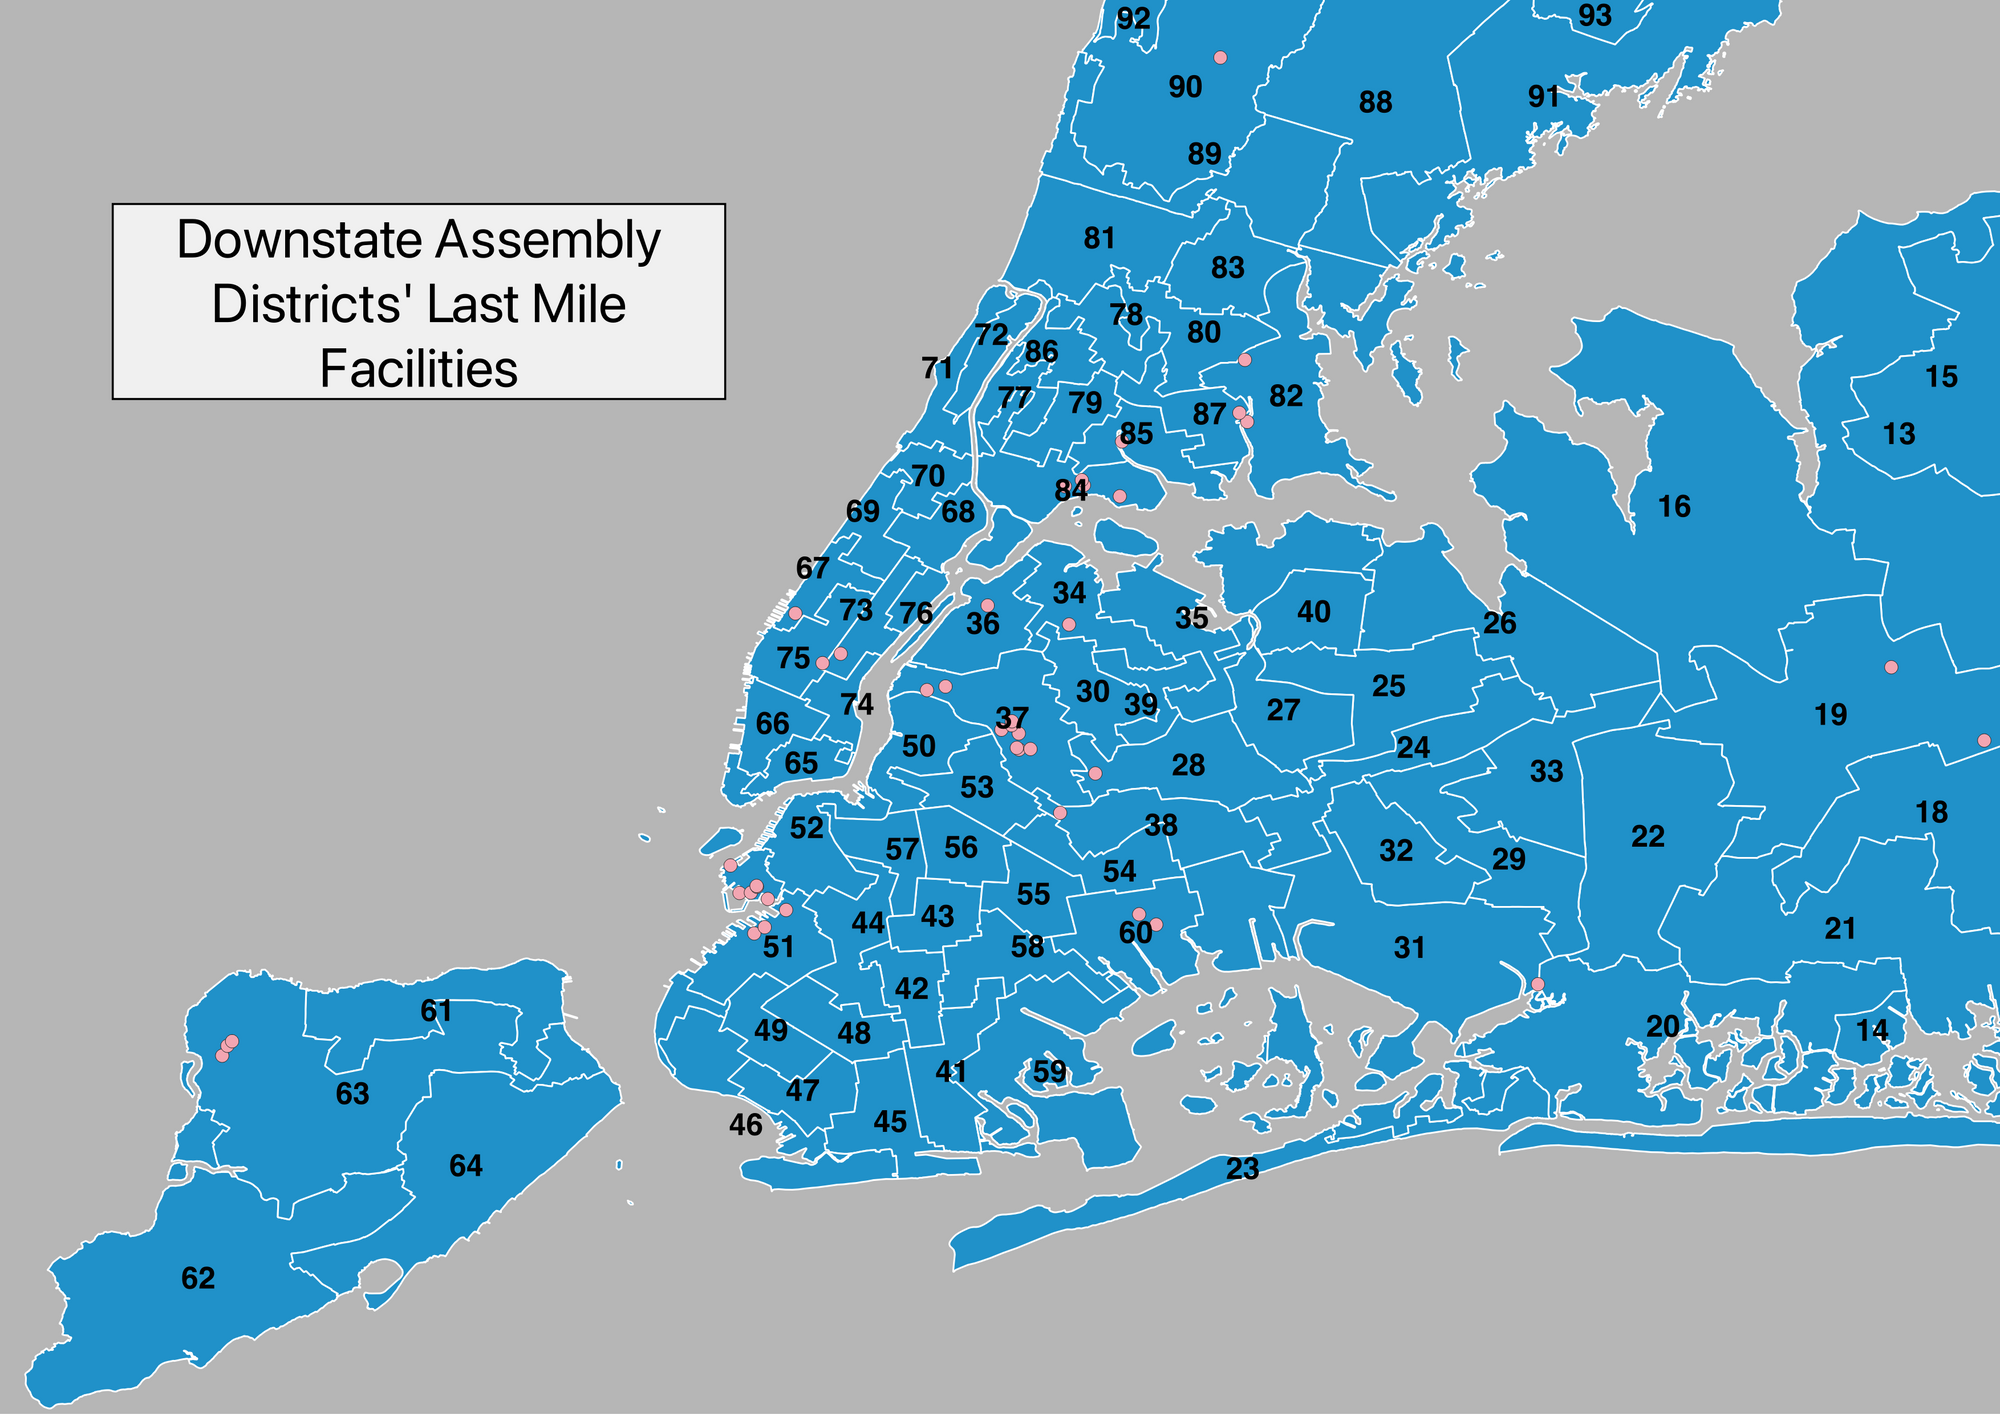

### Zip Code Maps
do in R for efficiency

see [R html file - DOWNLOAD TO VIEW](https://github.com/katrinagross/RedHookAccidents/blob/main/Accident-Visuals-updated-5.8.html) for the creation of maps/charts

### Collisions 2012-2021

- Red Hook and Surroundind area starts to increase 2017+
- Surrouind zip codes around 2016
- Hard to tell if it's facility related

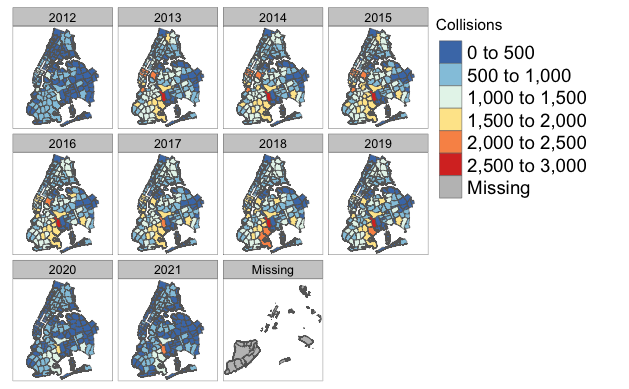

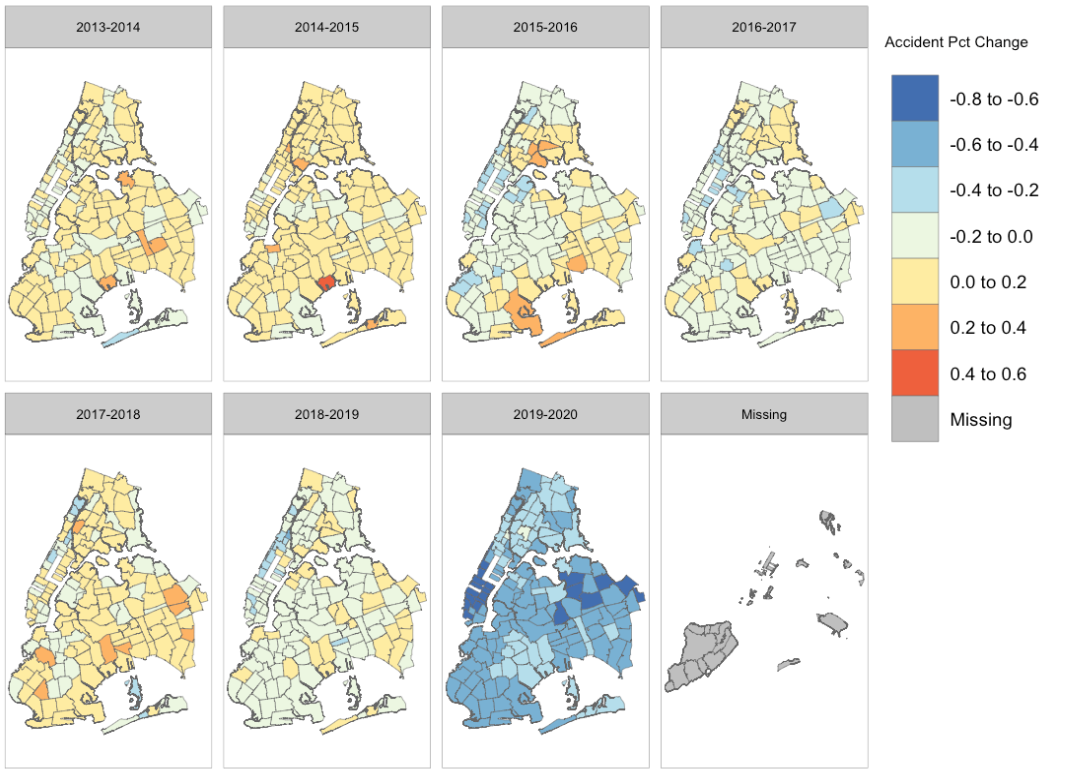

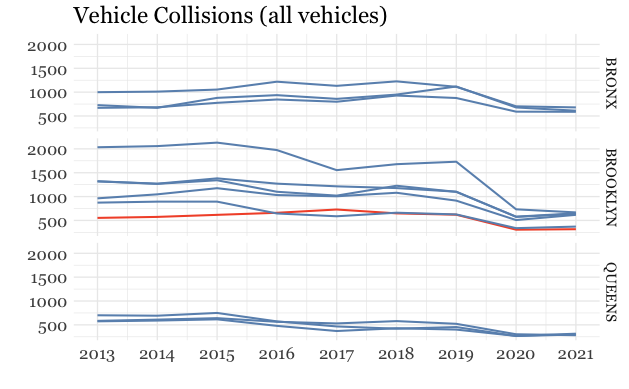

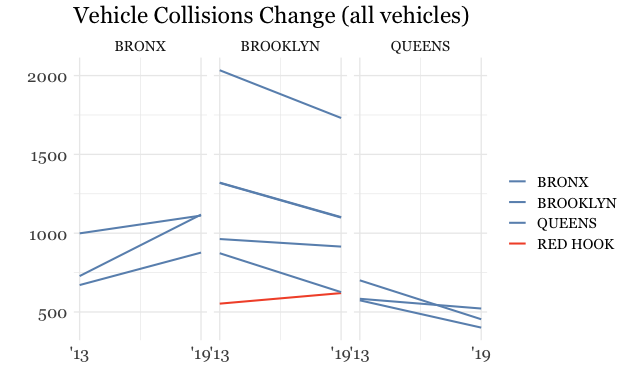

In [ ]:
# isolate to red hook zip for now

injuries_rh = collisions.loc[(collisions['Pedestrian_hurt']>0)&
                                       (collisions['ZIP CODE']=="11231")].reset_index(drop = True)
injuries_rh.shape

(360, 35)

In [ ]:
injuries_rh = injuries_rh[injuries_rh['LATITUDE'].notna()]

In [ ]:
injuries_rh.groupby('year')['CRASH DATE'].nunique().reset_index()

,year,CRASH DATE
0,2012,14
1,2013,42
2,2014,37
3,2015,36
4,2016,36
5,2017,42
6,2018,35
7,2019,37
8,2020,24
9,2021,28


# Pre and Post 2017 Maps

## Injuries only

In [ ]:
latlong_grp_pre17 = injuries_rh[(injuries_rh['year']<2017)&
                                (injuries_rh['truck_involved']==0)].groupby(['LATITUDE', 'LONGITUDE'])['CRASH DATE'].nunique().reset_index()
#latlong_grp_pre17.head()

latlong_pre17_truck = injuries_rh[(injuries_rh['year']<2017)&
                                  (injuries_rh['truck_involved']==1)].groupby(['LATITUDE', 'LONGITUDE'])['CRASH DATE'].nunique().reset_index()
print(latlong_pre17_truck.shape)
latlong_pre17_truck.head()

(7, 3)


,LATITUDE,LONGITUDE,CRASH DATE
0,40.674222,-74.011179,1
1,40.674626,-74.007711,1
2,40.676945,-73.991875,1
3,40.677355,-74.004456,1
4,40.677862,-74.012305,1


In [ ]:
# create lat long list

lat_long_pre = list(zip(latlong_grp_pre17['LATITUDE'],latlong_grp_pre17['LONGITUDE'], latlong_grp_pre17['CRASH DATE']))
lat_long_pre_t = list(zip(latlong_pre17_truck['LATITUDE'],latlong_pre17_truck['LONGITUDE'], latlong_pre17_truck['CRASH DATE']))

In [ ]:
m1 = folium.Map(location=[40.675, -74.001],
       zoom_start=15,
       tiles = "https://api.mapbox.com/styles/v1/kogross/cl1fbguww003a14n4ovln5qxg/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOGs2eHUwN2ZjMm9uYTVqc21zd3BmIn0.Z1r_mDE3UOm4hv3TnTIFYw",
       attr = "pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOGs2eHUwN2ZjMm9uYTVqc21zd3BmIn0.Z1r_mDE3UOm4hv3TnTIFYw Mapbox Attribution")

# non-truck accidents
for pair in range(len(lat_long_pre)):
  folium.CircleMarker(location=[lat_long_pre[pair][0], lat_long_pre[pair][1]],
                                radius=lat_long_pre[pair][2],
                                weight=5, 
                                fill = True, fill_opacity = 0.7,
                                color = "#14a5b8").add_to(m1)
# truck accidents
for pair in range(len(lat_long_pre_t)):
  folium.CircleMarker(location=[lat_long_pre_t[pair][0], lat_long_pre_t[pair][1]],
                                radius=lat_long_pre_t[pair][2],
                                weight=5, 
                                fill = True, fill_opacity = 0.7,
                                color = "#e00b48").add_to(m1)

In [ ]:
m1

Post 2017

In [ ]:
latlong_grp_post17 = injuries_rh[(injuries_rh['year']>=2017)&
                                 (injuries_rh['truck_involved']==0)].groupby(['LATITUDE', 'LONGITUDE'])['CRASH DATE'].nunique().reset_index()
latlong_grp_post17.head()

latlong_post17_truck = injuries_rh[(injuries_rh['year']>=2017)&
                                   (injuries_rh['truck_involved']==1)].groupby(['LATITUDE', 'LONGITUDE'])['CRASH DATE'].nunique().reset_index()


In [ ]:
# create lat long list

lat_long_post = list(zip(latlong_grp_post17['LATITUDE'],latlong_grp_post17['LONGITUDE'], latlong_grp_post17['CRASH DATE']))
lat_long_post_t = list(zip(latlong_post17_truck['LATITUDE'],latlong_post17_truck['LONGITUDE'], latlong_post17_truck['CRASH DATE']))

In [ ]:
m2 = folium.Map(location=[40.675, -74.001],
       zoom_start=15,
       tiles = "https://api.mapbox.com/styles/v1/kogross/cl1fbguww003a14n4ovln5qxg/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOGs2eHUwN2ZjMm9uYTVqc21zd3BmIn0.Z1r_mDE3UOm4hv3TnTIFYw",
       attr = "pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q Mapbox Attribution")


for pair in range(len(lat_long_post)):
  #print(pair)
  folium.CircleMarker(location=[lat_long_post[pair][0], lat_long_post[pair][1]],
                                radius=lat_long_post[pair][2],
                                weight=5, 
                                fill = True, fill_opacity = 0.7,
                                color = "#14a5b8").add_to(m2)

for pair in range(len(lat_long_post_t)):
  #print(pair)
  folium.CircleMarker(location=[lat_long_post_t[pair][0], lat_long_post_t[pair][1]],
                                radius=lat_long_post_t[pair][2],
                                weight=5, 
                                fill = True, fill_opacity = 0.7,
                                color = "#e00b48").add_to(m2)                               

m2

Look at all accidents

In [ ]:
import altair as alt

In [ ]:
collisions['Truck'] = np.where(collisions['truck_involved']==1, "Truck", "Non-Truck")

In [ ]:
redhook = collisions[collisions['ZIP CODE']=="11231"].reset_index(drop = True)

In [ ]:
redhook.shape

(5297, 36)

In [ ]:
redhook.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Pedestrian_hurt,truck_involved,Date,year,month_year,hour,Truck
0,04/15/2021,5:27,BROOKLYN,11231,40.678160,-74.014160,"(40.67816, -74.01416)",WOLCOTT STREET,CONOVER STREET,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Unspecified,Unspecified,Unspecified,NaN,4408325,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,0,0,2021-04-15,2021,2021-04,5,Non-Truck
1,04/14/2021,13:55,BROOKLYN,11231,40.674740,-73.997770,"(40.67474, -73.99777)",SMITH STREET,WEST 9 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,NaN,NaN,NaN,NaN,4407522,SEMI TRAIL,NaN,NaN,NaN,NaN,0,0,2021-04-14,2021,2021-04,13,Non-Truck
2,04/17/2021,10:29,BROOKLYN,11231,40.680790,-73.991740,"(40.68079, -73.99174)",UNION STREET,HOYT STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4408185,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,0,2021-04-17,2021,2021-04,10,Non-Truck
3,04/14/2021,10:45,BROOKLYN,11231,40.676765,-73.999695,"(40.676765, -73.999695)",NaN,NaN,153 NELSON STREET,1.0,0.0,0,0,0,0,1,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4409423,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,0,2021-04-14,2021,2021-04,10,Non-Truck
4,04/22/2021,16:22,BROOKLYN,11231,40.678486,-74.006195,"(40.678486, -74.006195)",DWIGHT STREET,DELEVAN STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4409625,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,0,0,2021-04-22,2021,2021-04,16,Non-Truck


# Hourly Comparison Truck v. Non-Truck

In [ ]:
collisions.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Pedestrian_hurt,truck_involved,Date,year,month_year,hour,Truck
0,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,1,0,2021-04-13,2021,2021-04,21,Non-Truck
1,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN,0,0,2021-04-13,2021,2021-04,16,Non-Truck
2,04/13/2021,17:30,QUEENS,11106,NaN,NaN,NaN,33 st,31ave,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4408019,Sedan,Sedan,NaN,NaN,NaN,0,0,2021-04-13,2021,2021-04,17,Non-Truck
3,04/11/2021,21:06,BROOKLYN,11226,NaN,NaN,NaN,BEVERLEY ROAD,EAST 21 STREET,NaN,1.0,0.0,1,0,0,0,0,0,Passing Too Closely,NaN,NaN,NaN,NaN,4406488,Taxi,NaN,NaN,NaN,NaN,1,0,2021-04-11,2021,2021-04,21,Non-Truck
4,05/21/2019,22:50,BROOKLYN,11201,40.69754,-73.98312,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4136992,�MBU,Taxi,NaN,NaN,NaN,0,0,2019-05-21,2019,2019-05,22,Non-Truck


In [ ]:
collisions_sub = collisions[collisions['ZIP CODE'].isin(comparison_zips)].reset_index(drop = True)
print(collisions_sub.shape)

(103064, 36)


In [ ]:
collisions_sub = collisions_sub.merge(nyc_acs[['Total Pop', 'Housing Units', 'Year', 'Zip Code']], 
                          how = "left", left_on = ["ZIP CODE", 'year'], right_on = ['Zip Code', "Year"])
print(collisions_sub.shape)

(103064, 40)


In [ ]:
del collisions_sub['Year']
del collisions_sub['Zip Code']

In [ ]:
collisions_sub.sample(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Pedestrian_hurt,truck_involved,Date,year,month_year,hour,Truck,Total Pop,Housing Units
79493,06/04/2014,12:40,BROOKLYN,11201,40.693721,-73.990455,"(40.6937214, -73.9904546)",MONTAGUE STREET,CADMAN PLAZA WEST,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,346263,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,0,2014-06-04,2014,2014-06,12,Non-Truck,56488,28401
62269,10/15/2015,13:30,QUEENS,11103,40.765481,-73.913699,"(40.7654813, -73.9136994)",STEINWAY STREET,28 AVENUE,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,3316118,MOTORCYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,2015-10-15,2015,2015-10,13,Non-Truck,39231,18029
26855,10/07/2018,20:45,QUEENS,11106,40.760200,-73.937500,"(40.7602, -73.9375)",14 STREET,36 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3995444,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,0,1,2018-10-07,2018,2018-10,20,Truck,38363,38363


In [ ]:
zip_sub_annual = collisions_sub.groupby(['ZIP CODE', 'BOROUGH', 'hour', 'year', 'Truck', 'Total Pop'])['COLLISION_ID'].nunique().reset_index()

In [ ]:
zip_sub_annual.sample(3)

,ZIP CODE,BOROUGH,hour,year,Truck,Total Pop,COLLISION_ID
5184,11379,QUEENS,16,2012,Truck,35680,1
1746,11106,QUEENS,10,2016,Truck,39409,5
4412,11232,BROOKLYN,17,2019,Truck,26430,8


In [ ]:
zip_sub_annual['collision_rate'] = zip_sub_annual['COLLISION_ID']/zip_sub_annual['Total Pop']*1000

## Red Hook: Histograms for truck/non-truck by yr/hr of crash occurance

In [ ]:
hr_count = zip_sub_annual[zip_sub_annual['ZIP CODE']=="11231"]
hr_count.head()

,ZIP CODE,BOROUGH,hour,year,Truck,Total Pop,COLLISION_ID,collision_rate
3713,11231,BROOKLYN,0,2012,Non-Truck,34393,3,0.087227
3714,11231,BROOKLYN,0,2012,Truck,34393,1,0.029076
3715,11231,BROOKLYN,0,2013,Non-Truck,34137,3,0.087881
3716,11231,BROOKLYN,0,2014,Non-Truck,34605,10,0.288976
3717,11231,BROOKLYN,0,2015,Non-Truck,35263,4,0.113433


In [ ]:
chart = alt.Chart(hr_count).mark_bar(filled=True).encode(
    alt.X('hour:Q'),
    alt.Y('collision_rate:Q', scale=alt.Scale(domain=(0, 2.2), clamp = True)),
    alt.Column('year:N'),
    alt.Row('Truck:N')
).configure_mark(
    color='#6A92BB'
).properties(width=135, height=135)

chart.encoding.y.title = 'Collision Rate'
chart.encoding.row.title = 'Vehicle Type'
#chart.encoding.row.label = 'truck'

In [ ]:
chart

alt.Chart(...)

## Mott Haven: hourly histograms

In [ ]:
mott_haven

['10451', '10454', '10455']

In [ ]:
bx_collisions = zip_sub_annual[zip_sub_annual['ZIP CODE'].isin(mott_haven)].reset_index(drop = True)
bx_collisions.shape

(1219, 8)

In [ ]:
bx_collisions.head()

,ZIP CODE,BOROUGH,hour,year,Truck,Total Pop,COLLISION_ID,collision_rate
0,10451,BRONX,0,2012,Non-Truck,45931,14,0.304805
1,10451,BRONX,0,2013,Non-Truck,47069,23,0.488644
2,10451,BRONX,0,2013,Truck,47069,1,0.021245
3,10451,BRONX,0,2014,Non-Truck,47818,17,0.355515
4,10451,BRONX,0,2015,Non-Truck,48188,16,0.332033


In [ ]:
bx_collisions = bx_collisions.groupby(['hour', 'year', 'Truck'])['Total Pop', 'COLLISION_ID'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
bx_collisions['collision_rate'] = bx_collisions['COLLISION_ID']/bx_collisions['Total Pop']*1000

In [ ]:
bx_collisions.head()

,hour,year,Truck,Total Pop,COLLISION_ID,collision_rate
0,0,2012,Non-Truck,121895,33,0.270725
1,0,2013,Non-Truck,123734,53,0.428338
2,0,2013,Truck,47069,1,0.021245
3,0,2014,Non-Truck,126520,43,0.339867
4,0,2015,Non-Truck,128809,48,0.372645


In [ ]:
chart_bx = alt.Chart(bx_collisions).mark_bar(filled=True).encode(
    alt.X('hour:Q'),
    alt.Y('collision_rate:Q', scale=alt.Scale(domain=(0, 2.2), clamp = True)),
    alt.Column('year:N'),
    alt.Row('Truck:N')
).configure_mark(
    color='#6A92BB'
).properties(width=135, height=135)


#chart_bx.encoding.title = 'Mott Haven Collision Incidents'
chart_bx.encoding.y.title = 'Collision Rate'
chart_bx.encoding.row.title = 'Vehicle Type'
#chart.encoding.row.label = 'truck'

In [ ]:
chart_bx

alt.Chart(...)

## Queens ZIPS: Hourly Histograms

11379 = Middle Village

11103 = Long Island City

11106 = Astoria

11378 = Maspeth

In [ ]:
other

['11222', '11379', '11103', '11106', '11378']

In [ ]:
queens_collisions = zip_sub_annual[zip_sub_annual['ZIP CODE'].isin(['11379', '11103', '11106', '11378'])].reset_index(drop = True)
queens_collisions.shape

(1558, 8)

In [ ]:
queens_collisions = queens_collisions.groupby(['hour', 'year', 'Truck'])['Total Pop', 'COLLISION_ID'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
queens_collisions['collision_rate'] = queens_collisions['COLLISION_ID']/queens_collisions['Total Pop']*1000

In [ ]:
queens_collisions.head()

,hour,year,Truck,Total Pop,COLLISION_ID,collision_rate
0,0,2012,Non-Truck,141549,30,0.211941
1,0,2012,Truck,32187,1,0.031068
2,0,2013,Non-Truck,142704,61,0.427458
3,0,2014,Non-Truck,143469,57,0.397298
4,0,2014,Truck,69487,2,0.028782


In [ ]:
chart_other = alt.Chart(queens_collisions).mark_bar(filled=True).encode(
    alt.X('hour:Q'),
    alt.Y('collision_rate:Q', scale=alt.Scale(domain=(0, 2.2), clamp = True)),
    alt.Column('year:N'),
    alt.Row('Truck:N')
).configure_mark(
    color='#6A92BB'
).properties(width=135, height=135)

chart_other.encoding.y.title = 'Collision Incidents'
chart_other.encoding.row.title = 'Vehicle Type'


In [ ]:
chart_other

alt.Chart(...)

Greenpoint

Map All Accidents

In [ ]:
redhook.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Pedestrian_hurt,truck_involved,Date,year,month_year,hour,Truck
0,04/15/2021,5:27,BROOKLYN,11231,40.678160,-74.014160,"(40.67816, -74.01416)",WOLCOTT STREET,CONOVER STREET,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Unspecified,Unspecified,Unspecified,NaN,4408325,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,0,0,2021-04-15,2021,2021-04,5,Non-Truck
1,04/14/2021,13:55,BROOKLYN,11231,40.674740,-73.997770,"(40.67474, -73.99777)",SMITH STREET,WEST 9 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,NaN,NaN,NaN,NaN,4407522,SEMI TRAIL,NaN,NaN,NaN,NaN,0,0,2021-04-14,2021,2021-04,13,Non-Truck
2,04/17/2021,10:29,BROOKLYN,11231,40.680790,-73.991740,"(40.68079, -73.99174)",UNION STREET,HOYT STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4408185,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,0,2021-04-17,2021,2021-04,10,Non-Truck
3,04/14/2021,10:45,BROOKLYN,11231,40.676765,-73.999695,"(40.676765, -73.999695)",NaN,NaN,153 NELSON STREET,1.0,0.0,0,0,0,0,1,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4409423,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,0,2021-04-14,2021,2021-04,10,Non-Truck
4,04/22/2021,16:22,BROOKLYN,11231,40.678486,-74.006195,"(40.678486, -74.006195)",DWIGHT STREET,DELEVAN STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4409625,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,0,0,2021-04-22,2021,2021-04,16,Non-Truck


In [ ]:
redhook_before = redhook[(redhook['year']<2017)&(redhook['truck_involved']==1)].reset_index(drop = True)
redhook_before = redhook_before[["LATITUDE", "LONGITUDE"]]
redhook_before = redhook_before.dropna()
redhook_before = redhook_before.values


redhook_after = redhook[(redhook['year']>=2017)&(redhook['truck_involved']==1)].reset_index(drop = True)
redhook_after = redhook_after[["LATITUDE", "LONGITUDE"]]
redhook_after = redhook_after.dropna()
redhook_after = redhook_after.values

In [ ]:
redhook_before[0:10]

array([[ 40.671314, -74.00123 ],
       [ 40.684994, -74.00519 ],
       [ 40.68443 , -73.99491 ],
       [ 40.671852, -74.00325 ],
       [ 40.683544, -73.99263 ],
       [ 40.68191 , -74.00504 ],
       [ 40.681057, -74.00856 ],
       [ 40.681473, -73.996346],
       [ 40.67733 , -74.01293 ],
       [ 40.684544, -74.00295 ]])

In [ ]:
redhook_before.shape

(195, 2)

In [ ]:
from folium import plugins

In [ ]:
import sys
sys.setrecursionlimit(2000)

In [ ]:
m3 = folium.Map(location=[40.675, -74.001],
       zoom_start=15,
       tiles = "https://api.mapbox.com/styles/v1/kogross/cl1fbguww003a14n4ovln5qxg/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q",
       attr = "pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q Mapbox Attribution")


m3.add_children(plugins.HeatMap(redhook_before, radius=10))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys


In [ ]:
m4 = folium.Map(location=[40.675, -74.001],
       zoom_start=15,
       tiles = "https://api.mapbox.com/styles/v1/kogross/cl1fbguww003a14n4ovln5qxg/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q",
       attr = "pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q Mapbox Attribution")


m4.add_children(plugins.HeatMap(redhook_after, radius=10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys


Do the same for the Bronx - Mott Haven / Port Morris Neighborhoods

In [ ]:
bronx = collisions[collisions['ZIP CODE'].isin(mott_haven)].reset_index(drop = True)

In [ ]:
bronx['ZIP CODE'].unique()

array(['10451', '10454', '10455'], dtype=object)

In [ ]:
bronx.shape

(24457, 36)

In [ ]:
# 2018 for fresh direct

bronx_before = bronx[(bronx['year']<2018)&(bronx['truck_involved']==1)].reset_index(drop = True)
bronx_before = bronx_before[["LATITUDE", "LONGITUDE"]]
bronx_before = bronx_before.dropna()
bronx_before = bronx_before.values

print(bronx_before.shape)

bronx_after = bronx[(bronx['year']>=2018)&(bronx['truck_involved']==1)].reset_index(drop = True)
bronx_after = bronx_after[["LATITUDE", "LONGITUDE"]]
bronx_after = bronx_after.dropna()
bronx_after = bronx_after.values

print(bronx_after.shape)


(723, 2)
(1252, 2)


In [ ]:
m5 = folium.Map(location=[40.809, -73.9208],
       zoom_start=15,
       tiles = "https://api.mapbox.com/styles/v1/kogross/cl1fbguww003a14n4ovln5qxg/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q",
       attr = "pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q Mapbox Attribution")


m5.add_children(plugins.HeatMap(bronx_before, radius=12))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys


In [ ]:
m6 = folium.Map(location=[40.809, -73.9208],
       zoom_start=15,
       tiles = "https://api.mapbox.com/styles/v1/kogross/cl1fbguww003a14n4ovln5qxg/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q",
       attr = "pk.eyJ1Ijoia29ncm9zcyIsImEiOiJja3pvOTFjb2k1eGI3MnZuZmdhMTc1cHc2In0.3M03KQC5nYWPpyI6H7GJ0Q Mapbox Attribution")


m6.add_children(plugins.HeatMap(bronx_after, radius=12))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys
